<a href="https://colab.research.google.com/github/Shantnu-Talokar/DeepLearningLab/blob/main/DLPractical3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:

# Step 1: Load Diabetes Dataset (use only BMI feature)
diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 2]   # BMI feature
y = diabetes.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize Parameters
m = len(X_train)           # Number of training samples
theta0 = 0                 # Intercept
theta1 = 0                 # Slope
alpha = 0.001               # Learning rate (reduced from 0.01 to 0.001)
iterations = 1000          # Number of iterations
cost_history = []          # Store cost per iteration

In [6]:
# Step 3: Gradient Descent Function
for i in range(iterations):
    y_pred = theta0 + theta1 * X_train
    error = y_pred - y_train

    # Update parameters (Batch Gradient Descent)
    theta0 -= alpha * (1/m) * np.sum(error)
    theta1 -= alpha * (1/m) * np.sum(error * X_train)

    # Compute Cost (Mean Squared Error)
    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)

In [7]:
# Step 4: Predictions using Gradient Descent parameters
y_train_pred = theta0 + theta1 * X_train
y_test_pred = theta0 + theta1 * X_test

# Step 5: Evaluate Model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Parameters from Gradient Descent: theta0 = {theta0:.4f}, theta1 = {theta1:.4f}")
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"R² Score on Test Set: {r2_test:.4f}")

Parameters from Gradient Descent: theta0 = 153.7363, theta1 = 0.1217
Train MSE: 6075.86
Test MSE: 5361.08
R² Score on Test Set: -0.0119


Parameters from Normal Equation: theta0 = 152.0034, theta1 = 998.5777


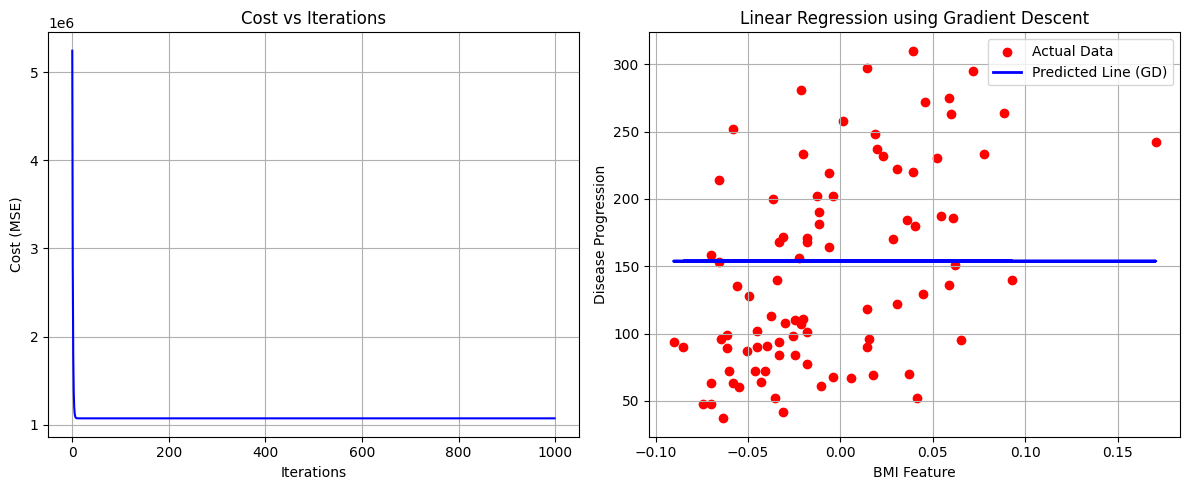

In [8]:
# Step 6: Normal Equation Solution (Closed Form)
X_b = np.c_[np.ones((len(X_train), 1)), X_train]  # Add bias column
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

print(f"Parameters from Normal Equation: theta0 = {theta_best[0]:.4f}, theta1 = {theta_best[1]:.4f}")

# Step 7: Visualization

# Plot Cost vs Iterations
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(iterations), cost_history, color='blue')
plt.title("Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.grid(True)

# Plot Regression Line
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', label="Actual Data")
plt.plot(X_test, y_test_pred, color='blue', linewidth=2, label="Predicted Line (GD)")
plt.title("Linear Regression using Gradient Descent")
plt.xlabel("BMI Feature")
plt.ylabel("Disease Progression")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()